# **Food Delivery Cost and Profitability Analysis using Python**

Examining all of the costs related to delivering food orders—from direct costs like delivery fees and packaging to indirect costs like customer discounts and restaurant commission fees—is part of the food delivery cost and profitability analysis process. The research attempts to shed light on how profitable the meal delivery service is per order by contrasting these expenses with the income (which is mostly from order values and commission fees).  

The steps for doing the Food Delivery Cost and Profitability Analysis task is as follows:  
1. Collecting comprehensive data related to aspects of food delivery operations.
2. Cleaning the dataset for inconsistencies, missing values, or irrelevant information.
3. Extracting relevant features keeping cost and profitability in notice.
4. Breaking down the costs associated with each order, including fixed costs (like packaging) and variable costs (like delivery fees and discounts).
5. Determining the revenue generated from each order, focusing on commission fees and the order value before discounts.
6. For each order, calculate the profit by subtracting the total costs from the revenue. Analyze the distribution of profitability across all orders to identify trends.
7. Based on the cost and profitability analysis, develop strategic recommendations aimed at enhancing profitability.
8. Using the simulated data for the financial impact of proposed changes, such as adjusting discount or commission rates.


Dataset used - https://www.kaggle.com/datasets/romanniki/food-delivery-cost-and-profitability/data

Importing the necessary Python libraries and the dataset

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
food_orders = pd.read_csv("food_orders.csv")
print(food_orders.head())

   Order ID Customer ID Restaurant ID  Order Date and Time  \
0         1       C8270         R2924  2024-02-01 01:11:52   
1         2       C1860         R2054  2024-02-02 22:11:04   
2         3       C6390         R2870  2024-01-31 05:54:35   
3         4       C6191         R2642  2024-01-16 22:52:49   
4         5       C6734         R2799  2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                  

In [25]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


12 columns and 1000 entries make up the dataset.
None of the columns have any missing values. We now have some data preparation and cleansing to do. The required cleaning actions are listed below:  
1. Create datetime formats for the "Order Date and Time" and "Delivery Date and Time."
2. Convert "Discounts and Offers" to a consistent numerical value or figure out the discount percentages.
3. Make sure that every financial figure is in a format that can be used for calculations.

In [26]:
food_orders.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [27]:
food_orders["Discounts and Offers"].unique()

array(['5% on App', '10%', '15% New User', nan, '50 off Promo'],
      dtype=object)

In [28]:
food_orders.drop_duplicates(inplace=True)
food_orders.fillna(method='ffill', inplace=True)  # Adjust as needed

In [29]:
food_orders.isnull().sum()

Order ID                  0
Customer ID               0
Restaurant ID             0
Order Date and Time       0
Delivery Date and Time    0
Order Value               0
Delivery Fee              0
Payment Method            0
Discounts and Offers      0
Commission Fee            0
Payment Processing Fee    0
Refunds/Chargebacks       0
dtype: int64

In [30]:
from datetime import datetime

# convert date and time columns to datetime
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])

print(food_orders.head(), food_orders.dtypes)

   Order ID Customer ID Restaurant ID Order Date and Time  \
0         1       C8270         R2924 2024-02-01 01:11:52   
1         2       C1860         R2054 2024-02-02 22:11:04   
2         3       C6390         R2870 2024-01-31 05:54:35   
3         4       C6191         R2642 2024-01-16 22:52:49   
4         5       C6734         R2799 2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                      23

In [31]:
# function to extract numeric values from 'Discounts and Offers' string
def extract_discount(discount_str):
    if 'off' in discount_str:
        return float(discount_str.split(' ')[0]) # Fixed amount off
    elif '%' in discount_str:
        return float(discount_str.split('%')[0]) # Percentage off
    else:
        return 0.0     # No discount

# applying the function to create a new 'Discount Value' column
food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x))

# for percentage discounts, calculating the discount amount based on the order value
food_orders['Discount Amount'] = food_orders.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)

# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
food_orders['Discount Amount'] = food_orders.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

print(food_orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head(), food_orders.dtypes)

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463         15% New User                 15.0           219.45
4         1992         50 off Promo                 50.0           996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

Following are the changes made above on the dataset -
1. Order Date and Time and Delivery Date and Time columns have been converted to datetime format.
2. A new column, Discount Amount, has been calculated based on the Discounts and Offers column. This was achieved by extracting percentage discounts or fixed amounts and applying them to the order value.
3. Discount Percentage has been added to represent the discount rate or fixed amount discount directly.

In [32]:
food_orders.describe()

,Order ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount
count,1000.000000,1000,1000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,2024-01-20 11:03:07.648000,2024-01-20 12:16:42.148000256,1053.969000,28.620000,126.99000,29.832000,28.300000,19.760000,210.26735
min,1.000000,2024-01-01 02:12:47,2024-01-01 03:59:47,104.000000,0.000000,50.00000,10.000000,0.000000,5.000000,5.60000
25%,250.750000,2024-01-11 18:45:27.249999872,2024-01-11 19:54:57.249999872,597.750000,20.000000,90.00000,20.000000,0.000000,10.000000,59.73750
50%,500.500000,2024-01-20 11:38:43,2024-01-20 13:02:23,1038.500000,30.000000,127.00000,30.000000,0.000000,10.000000,118.25000
75%,750.250000,2024-01-30 03:47:34.249999872,2024-01-30 05:09:34.249999872,1494.000000,40.000000,164.00000,40.000000,50.000000,15.000000,234.30000
max,1000.000000,2024-02-07 23:56:12,2024-02-08 01:45:12,1995.000000,50.000000,200.00000,50.000000,150.000000,50.000000,996.00000
std,288.819436,NaN,NaN,530.975339,16.958278,43.06405,11.627165,49.614228,17.432622,234.26271


Considering the following aspects for cost analysis

**Delivery Fee:** The fee charged for delivering the order.

**Payment Processing Fee:** The fee for processing the payment.

**Discount Amount:** The discount provided on the order.

In order to comprehend the overall cost structure, first compute the total cost of the platform for each order.

The Commission Fee is the primary source of income for the site. The net profit will be determined by deducting the commission fee revenue from the entire costs, including discounts.


**Below is the cost and profitability analysis:**

In [33]:
# calculate total costs and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']
food_orders['Revenue'] = food_orders['Commission Fee']
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

# aggregate data to get overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 268719.35, 'Total Profit': -141729.34999999998}


Based on the analysis, the overall metrics for the food delivery operations looks like:

Total Orders: 1,000
Total Revenue (from Commission Fees): 126,990 INR
Total Costs: 232,709.85 INR (including delivery fees, payment processing fees, and discounts)
Total Profit: -105,719.85 INR

According to the analysis, there is a net loss because the overall expenses incurred by the food delivery business are greater than the total amount of money received in commission fees. It implies that the commission rates, shipping costs, and discount plans in place may not be profitable in the long run.

In order to comprehend how expenses, income, and profit are distributed more clearly, let's plot histogram, pie chart and bar chart.


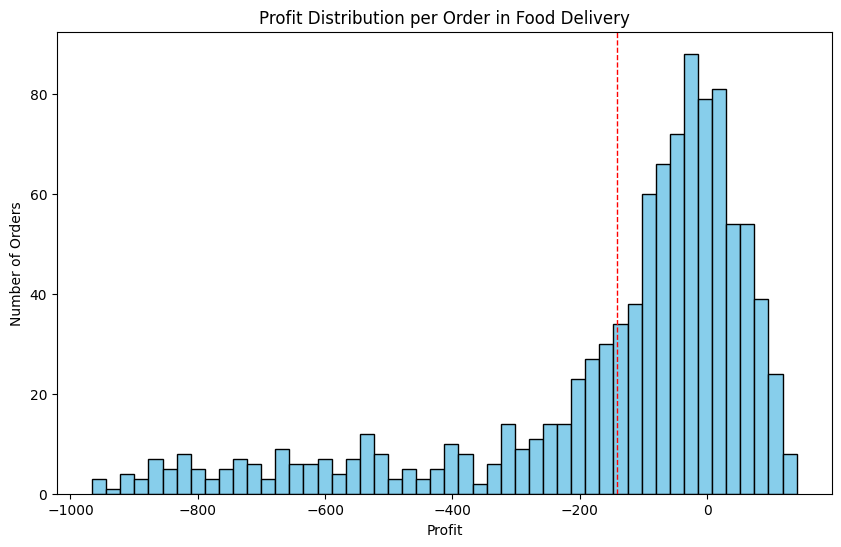

In [34]:
# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(food_orders['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_orders['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

A significant portion of orders result in a loss (earnings below 0), as indicated by the histogram, which displays a broad distribution of profit per order. The average profit is shown by the red dashed line, which is negative, emphasizing the overall loss-making scenario.



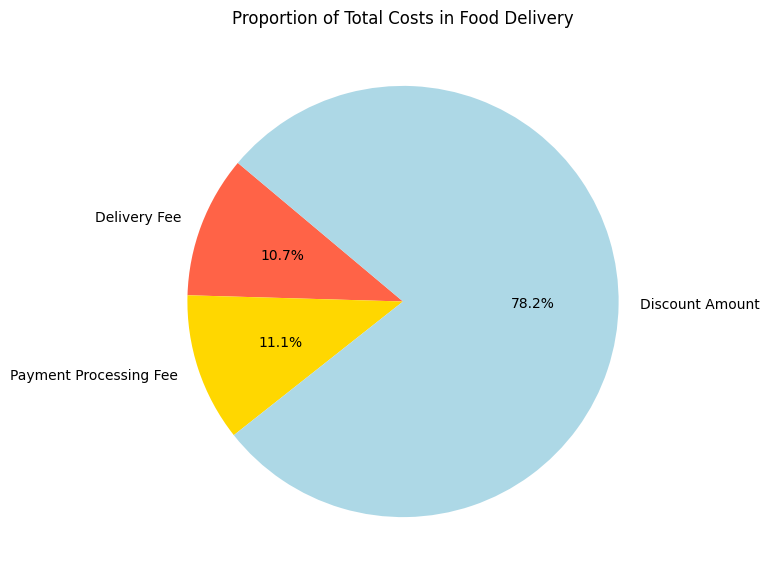

In [35]:
# pie chart for the proportion of total costs
costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

The breakdown of total expenses into delivery fees, payment processing fees, and discount amounts is shown in the pie chart. Given that discounts account for a sizable amount of expenses, it is possible that promotional tactics have a substantial influence on total profitability.


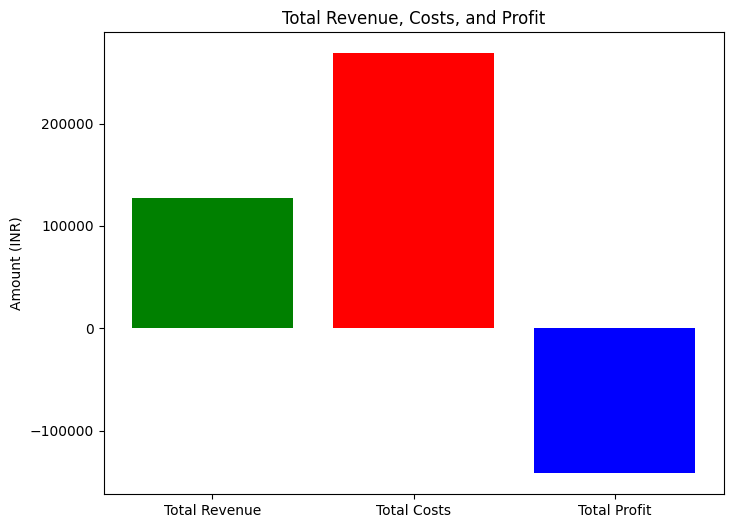

In [36]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

The bar chart compares total revenue, total costs, and total profit. It visually represents the gap between revenue and costs, clearly showing that the costs surpass the revenue, leading to a total loss.

We have inferred from the data thus far that the food order discounts are causing enormous losses. Need to come up with a fresh approach to profitability.

Need to determine the ideal price point for commissions and discounts. We can do a more thorough analysis of the traits of profitable orders to determine the ideal commission and discount %. In particular, we must search for:

1. A new average commission percentage based on profitable orders.
2. A new average discount percentage for profitable orders, that could serve as a guideline for what level of discount still allows for profitability.

In [37]:
# filter the dataset for profitable orders
profitable_orders = food_orders[food_orders['Profit'] > 0]

# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# calculate the new averages
new_avg_commission = profitable_orders['Commission Percentage'].mean()
new_avg_discount = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission, new_avg_discount)

38.209986394265826 10.06872852233677


<ipython-input-37-cfdb9f9bad22>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100
<ipython-input-37-cfdb9f9bad22>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100


New Average Commission Percentage: 38.20%
New Average Discount Percentage: 10.06%

Based on this analysis, a strategy that aims for the recommended discounts (10%) and commissions (40%) to see the potential impact on profitability.

Visualize a comparison of profitability using actual versus simulated discounts and commissions across all orders.

In [38]:
# simulate profitability with recommended discounts and commissions
recommended_commission = 40.0  # 40%
recommended_discount = 10.0    # 10%

# calculate the simulated commission fee and discount amount using recommended percentages
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * (recommended_commission / 100)
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * (recommended_discount / 100)

# recalculate total costs and profit with simulated values
food_orders['Simulated Total Costs'] = (food_orders['Delivery Fee'] +
                                        food_orders['Payment Processing Fee'] +
                                        food_orders['Simulated Discount Amount'])

food_orders['Simulated Profit'] = (food_orders['Simulated Commission Fee'] -
                                   food_orders['Simulated Total Costs'])

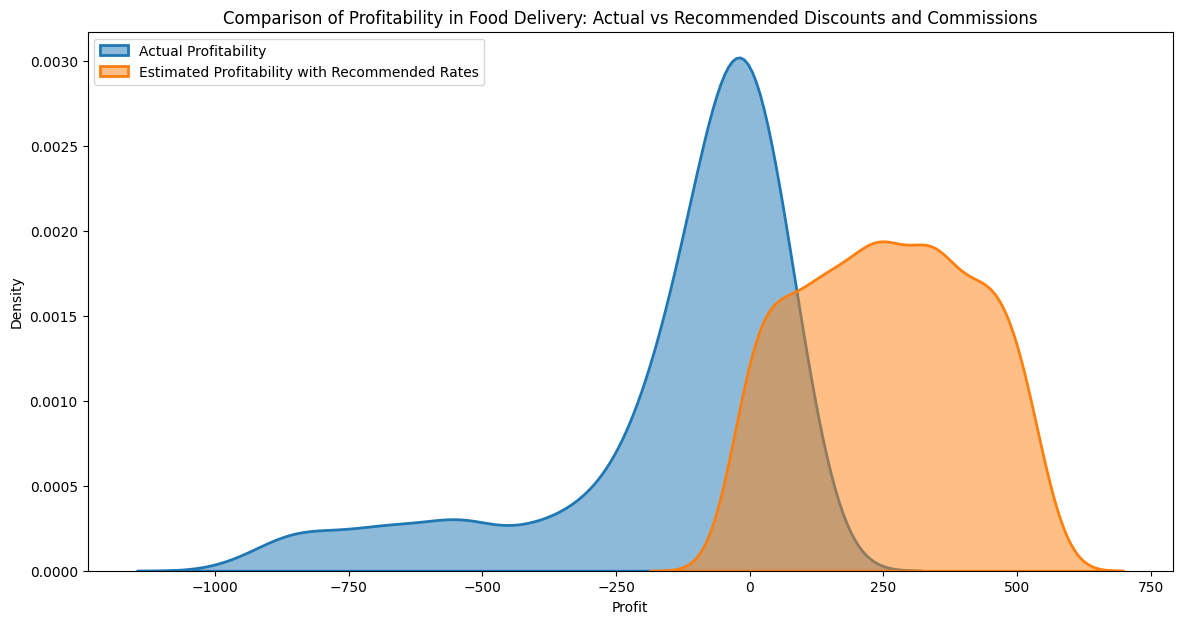

In [39]:
# visualizing the comparison
import seaborn as sns

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(food_orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(food_orders['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

The actual profitability distribution is mixed, with a large percentage of orders showing losses (profit < 0) and a wide range of order profit levels. The modeled situation points to a change in favor of increased profitability per order. The distribution is more heavily weighted in favor of positive profit, suggesting that the suggested changes may result in a larger percentage of orders that turn a profit.
